Importing neccessary Libraries 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

#Ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

Reading the data 

In [3]:
dataset_link = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Exploring the data and making the required changes for better understanding 



In [4]:
data.isnull().sum()
# No null values so we can proceed 

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
df.reset_index(inplace=True)

Visualizing the data 

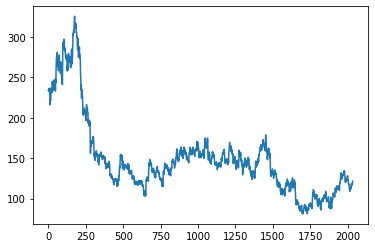

In [7]:
plt.plot(df['Close'])

In [8]:
df_close = df['Close']
df_close

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

The scaling and transformation is complete as you can see it above in any array

Now, it is time to split the data

In [21]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [22]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [24]:
X_train.shape

(1323, 100)

In [25]:
y_train.shape

(1323,)

In [26]:
X_test.shape

(510, 100)

In [27]:
y_test.shape

(510,)

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

It is now time to Create the LSTM Model


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 13s 260ms/step - loss: 0.0145 - val_loss: 0.0018
Epoch 2/60
19/19 [==============================] - 3s 155ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 3s 154ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 155ms/step - loss: 9.3816e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 3s 154ms/step - loss: 8.5117e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 154ms/step - loss: 8.1615e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 154ms/step - loss: 8.0012e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 3s 152ms/step - loss: 7.8716e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 152ms/step - loss: 7.6513e-04 - val_loss: 9.8426e-04
Epoch 10/60
19/19 [==============================] - 3s 154ms/step - lo

In [33]:
predictions = model.predict(X_test)

In [34]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [35]:
inv_predictions

array([[141.13106 ],
       [141.32434 ],
       [140.59015 ],
       [138.24709 ],
       [136.48567 ],
       [135.7965  ],
       [136.74312 ],
       [138.28784 ],
       [138.91422 ],
       [138.67548 ],
       [138.35193 ],
       [139.21782 ],
       [140.02896 ],
       [141.4826  ],
       [143.53885 ],
       [142.21423 ],
       [139.89299 ],
       [139.11363 ],
       [139.53755 ],
       [143.82616 ],
       [148.291   ],
       [150.81174 ],
       [151.28981 ],
       [149.364   ],
       [148.68068 ],
       [148.40721 ],
       [148.83238 ],
       [150.41727 ],
       [151.33928 ],
       [151.4339  ],
       [151.65468 ],
       [150.65694 ],
       [147.77426 ],
       [142.6129  ],
       [139.0655  ],
       [137.9099  ],
       [138.1083  ],
       [137.64967 ],
       [135.71506 ],
       [132.33528 ],
       [129.68301 ],
       [128.30968 ],
       [126.49647 ],
       [125.61843 ],
       [123.89787 ],
       [121.53187 ],
       [120.538605],
       [120.1

Since we have predicted the values, now let us check mean squared error for our model



In [36]:
import math
from sklearn.metrics import mean_squared_error

In [37]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.0642525972099519
